<a href="https://colab.research.google.com/github/gargiiiii18/colab-notebooks/blob/main/fashion_item_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd
import json
import io

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')


data = json.load(io.StringIO(uploaded[fn].decode('utf-8')))
df = pd.DataFrame(data)

print(df.head())

Saving fashion_dataset_balanced_popularity.json to fashion_dataset_balanced_popularity.json
User uploaded file "fashion_dataset_balanced_popularity.json" with length 501604 bytes
  fashion_center  season              item_name  weather_avg_temp  \
0          Milan  Summer               sundress              23.8   
1          Paris  Winter         leather jacket               7.0   
2       New York  Winter  fleece-lined leggings              -2.1   
3          Paris  Summer    short sleeve blouse              24.3   
4          Milan  Autumn             turtleneck              10.4   

                                         description  popularity_score  \
0      Sundress perfect for summer weather in Milan.            0.5417   
1  Leather jacket perfect for winter weather in P...            0.1657   
2  Fleece-lined leggings perfect for winter weath...            0.9135   
3  Short sleeve blouse perfect for summer weather...            0.8073   
4    Turtleneck perfect for autumn w

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

print("Dataframe Head\n")
print(df.head())

print("\nDataframe Info\n")
print(df.info())

print("\nDataframe Describe\n")
print(df.describe())

Dataframe Head

  fashion_center  season              item_name  weather_avg_temp  \
0          Milan  Summer               sundress              23.8   
1          Paris  Winter         leather jacket               7.0   
2       New York  Winter  fleece-lined leggings              -2.1   
3          Paris  Summer    short sleeve blouse              24.3   
4          Milan  Autumn             turtleneck              10.4   

                                         description  popularity_score  \
0      Sundress perfect for summer weather in Milan.            0.5417   
1  Leather jacket perfect for winter weather in P...            0.1657   
2  Fleece-lined leggings perfect for winter weath...            0.9135   
3  Short sleeve blouse perfect for summer weather...            0.8073   
4    Turtleneck perfect for autumn weather in Milan.            0.2512   

   historical_sales  consumer_sentiment_score  social_media_mentions  \
0              1235                      0.57       

In [3]:
print("Missing value count\n")
print(df.isnull().sum())

print('iTEMS WHICH BELONG TO NO EVENT\n')
df['event'].value_counts()['None']

Missing value count

fashion_center              0
season                      0
item_name                   0
weather_avg_temp            0
description                 0
popularity_score            0
historical_sales            0
consumer_sentiment_score    0
social_media_mentions       0
event                       0
holiday_influence_score     0
style                       0
dtype: int64
iTEMS WHICH BELONG TO NO EVENT



np.int64(726)

In [4]:
for col in ['fashion_center', 'season', 'event', 'style']:
  print(f"Unique columns in {col}: \n")
  print(df[col].unique())
  print('\n')

Unique columns in fashion_center: 

['Milan' 'Paris' 'New York']


Unique columns in season: 

['Summer' 'Winter' 'Autumn' 'Spring']


Unique columns in event: 

['None' 'Fashion Week' 'Parade' 'Design Fair' 'Broadway Premiere'
 'Music Festival' 'Local Festival' 'Art Exhibit']


Unique columns in style: 

['Chic' 'Casual' 'Sporty' 'Minimalist' 'Streetwear' 'Formal' 'Bohemian']




In [5]:
# df['fashion_center'].value_counts()
# df['season'].value_counts()
df['event'].value_counts()
# df['style'].value_counts()

,count
event,
None,726
Fashion Week,167
Design Fair,88
Parade,72
Broadway Premiere,41
Music Festival,40
Art Exhibit,36
Local Festival,30


Distribution of Popular items:


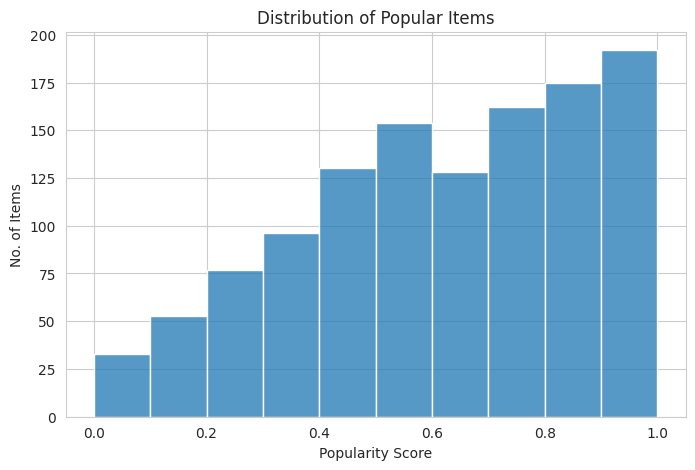

In [6]:
print("Distribution of Popular items:")

plt.figure(figsize=(8, 5))
sns.histplot(df['popularity_score'], bins=10, kde=False)
plt.title("Distribution of Popular Items")
plt.xlabel("Popularity Score")
plt.ylabel("No. of Items")
plt.show()

In [7]:
cols_to_drop = ['item_name', 'season', 'description', 'event']
df = df.drop(columns=cols_to_drop)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   fashion_center            1200 non-null   object 
 1   weather_avg_temp          1200 non-null   float64
 2   popularity_score          1200 non-null   float64
 3   historical_sales          1200 non-null   int64  
 4   consumer_sentiment_score  1200 non-null   float64
 5   social_media_mentions     1200 non-null   int64  
 6   holiday_influence_score   1200 non-null   float64
 7   style                     1200 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 75.1+ KB


In [8]:
df['buzz_score'] = df['consumer_sentiment_score']*df['social_media_mentions']
df['sales_to_mention_ratio'] = df['historical_sales'] / (df['social_media_mentions'] + 1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   fashion_center            1200 non-null   object 
 1   weather_avg_temp          1200 non-null   float64
 2   popularity_score          1200 non-null   float64
 3   historical_sales          1200 non-null   int64  
 4   consumer_sentiment_score  1200 non-null   float64
 5   social_media_mentions     1200 non-null   int64  
 6   holiday_influence_score   1200 non-null   float64
 7   style                     1200 non-null   object 
 8   buzz_score                1200 non-null   float64
 9   sales_to_mention_ratio    1200 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 93.9+ KB


In [10]:
categorical_cols = [col for col in df.columns if df[col].dtype =='object']
print(categorical_cols)

df = pd.get_dummies(df, columns=categorical_cols, drop_first=False, dtype=int)

print("After one-hot encoding")
print(df.head())
print(df.info())

['fashion_center', 'style']
After one-hot encoding
   weather_avg_temp  popularity_score  historical_sales  \
0              23.8            0.5417              1235   
1               7.0            0.1657               833   
2              -2.1            0.9135              1358   
3              24.3            0.8073               861   
4              10.4            0.2512               612   

   consumer_sentiment_score  social_media_mentions  holiday_influence_score  \
0                      0.57                    263                     0.14   
1                      0.48                    182                     0.78   
2                      0.46                     20                     0.69   
3                      0.46                    402                     0.16   
4                      0.74                     20                     0.26   

   buzz_score  sales_to_mention_ratio  fashion_center_Milan  \
0      149.91                4.678030                   

In [11]:
print(df.dtypes)
df.info()
df.head()

weather_avg_temp            float64
popularity_score            float64
historical_sales              int64
consumer_sentiment_score    float64
social_media_mentions         int64
holiday_influence_score     float64
buzz_score                  float64
sales_to_mention_ratio      float64
fashion_center_Milan          int64
fashion_center_New York       int64
fashion_center_Paris          int64
style_Bohemian                int64
style_Casual                  int64
style_Chic                    int64
style_Formal                  int64
style_Minimalist              int64
style_Sporty                  int64
style_Streetwear              int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   weather_avg_temp          1200 non-null   float64
 1   popularity_score          1200 non-null   float64
 2   histor

,weather_avg_temp,popularity_score,historical_sales,consumer_sentiment_score,social_media_mentions,holiday_influence_score,buzz_score,sales_to_mention_ratio,fashion_center_Milan,fashion_center_New York,fashion_center_Paris,style_Bohemian,style_Casual,style_Chic,style_Formal,style_Minimalist,style_Sporty,style_Streetwear
0,23.8,0.5417,1235,0.57,263,0.14,149.91,4.678030,1,0,0,0,0,1,0,0,0,0
1,7.0,0.1657,833,0.48,182,0.78,87.36,4.551913,0,0,1,0,1,0,0,0,0,0
2,-2.1,0.9135,1358,0.46,20,0.69,9.20,64.666667,0,1,0,0,0,0,0,0,1,0
3,24.3,0.8073,861,0.46,402,0.16,184.92,2.136476,0,0,1,0,0,0,0,1,0,0
4,10.4,0.2512,612,0.74,20,0.26,14.80,29.142857,1,0,0,0,1,0,0,0,0,0


In [12]:
x = df.drop('popularity_score', axis=1)
y = df['popularity_score']

print(f"shape of features on (x): {x.shape}")
print(f"shape of features on (y): {y.shape}")

shape of features on (x): (1200, 17)
shape of features on (y): (1200,)


In [13]:
for i, col in enumerate(x.columns, 1):
  print(f"{i}. {col}")

1. weather_avg_temp
2. historical_sales
3. consumer_sentiment_score
4. social_media_mentions
5. holiday_influence_score
6. buzz_score
7. sales_to_mention_ratio
8. fashion_center_Milan
9. fashion_center_New York
10. fashion_center_Paris
11. style_Bohemian
12. style_Casual
13. style_Chic
14. style_Formal
15. style_Minimalist
16. style_Sporty
17. style_Streetwear


In [14]:
print(y.name)

popularity_score


In [15]:
from sklearn.model_selection import train_test_split

y_binned = pd.cut(y, bins=5, labels=False)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y_binned)

print(f"shape of x_train: {x_train.shape}")
print(f"shape of x_test: {x_test.shape}")
print(f"shape of y_train: {y_train.shape}")
print(f"shape of y_test: {y_test.shape}")

shape of x_train: (960, 17)
shape of x_test: (240, 17)
shape of y_train: (960,)
shape of y_test: (240,)


In [16]:
y_train_binned = pd.cut(y, bins=5, labels=False)
y_test_binned = pd.cut(y, bins=5, labels=False)

print("Distribution of popularity in train set:\n")
print(y_train_binned.value_counts(normalize=True).sort_index()*100)

print("\nDistribution of popularity in test set:\n")
print(y_test_binned.value_counts(normalize=True).sort_index()*100)

Distribution of popularity in train set:

popularity_score
0     7.166667
1    14.416667
2    23.666667
3    24.166667
4    30.583333
Name: proportion, dtype: float64

Distribution of popularity in test set:

popularity_score
0     7.166667
1    14.416667
2    23.666667
3    24.166667
4    30.583333
Name: proportion, dtype: float64


In [17]:
x.columns
x.dtypes

,0
weather_avg_temp,float64
historical_sales,int64
consumer_sentiment_score,float64
social_media_mentions,int64
holiday_influence_score,float64
buzz_score,float64
sales_to_mention_ratio,float64
fashion_center_Milan,int64
fashion_center_New York,int64
fashion_center_Paris,int64


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(f"x_train_scaled shape: {x_train_scaled.shape}")
print(f"First 5 rows of x_train_scaled: \n")
print(x_train_scaled[:5, :5])

x_train_scaled shape: (960, 17)
First 5 rows of x_train_scaled: 

[[0.9331307  0.82652134 0.38383838 0.08979592 0.08974359]
 [0.6899696  0.48501362 0.49494949 0.09591837 0.25641026]
 [0.12158055 0.11716621 0.53535354 0.13469388 0.73076923]
 [0.54103343 0.29064487 0.26262626 0.17857143 0.16666667]
 [0.52583587 0.30245232 0.71717172 0.25204082 0.3974359 ]]


In [19]:
pd.DataFrame(x_train_scaled, columns=x_train.columns).head()

,weather_avg_temp,historical_sales,consumer_sentiment_score,social_media_mentions,holiday_influence_score,buzz_score,sales_to_mention_ratio,fashion_center_Milan,fashion_center_New York,fashion_center_Paris,style_Bohemian,style_Casual,style_Chic,style_Formal,style_Minimalist,style_Sporty,style_Streetwear
0,0.933131,0.826521,0.383838,0.089796,0.089744,0.058003,0.170729,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.689970,0.485014,0.494949,0.095918,0.256410,0.078680,0.119042,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.121581,0.117166,0.535354,0.134694,0.730769,0.113532,0.052785,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.541033,0.290645,0.262626,0.178571,0.166667,0.072636,0.051610,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.525836,0.302452,0.717172,0.252041,0.397436,0.266613,0.035690,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [20]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation, Dense, Dropout, BatchNormalization, Input

model = keras.Sequential([
    layers.Input(shape=(x_train_scaled.shape[1],)),
    layers.Dense(128, activation='relu'),
    Dropout(0.5),
    layers.Dense(64, activation='relu'),
    Dropout(0.3),
    layers.Dense(32, activation='relu'),
    Dropout(0.2),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mae']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor= 'val_loss',
    patience = 10,
    restore_best_weights = True
)

history = model.fit(
    x_train_scaled,
    y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.5002 - mae: 0.5002 - val_loss: 0.2788 - val_mae: 0.2788
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2561 - mae: 0.2561 - val_loss: 0.2545 - val_mae: 0.2545
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2478 - mae: 0.2478 - val_loss: 0.2416 - val_mae: 0.2416
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2277 - mae: 0.2277 - val_loss: 0.2562 - val_mae: 0.2562
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2321 - mae: 0.2321 - val_loss: 0.2500 - val_mae: 0.2500
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2364 - mae: 0.2364 - val_loss: 0.2439 - val_mae: 0.2439
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2316 - mae: 0.2316 - val_loss: 0.2465 - val_mae: 0.2465
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2435 - mae: 0.2435 - val_loss: 0.2430 - val_mae: 0.2430
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2271 - mae:

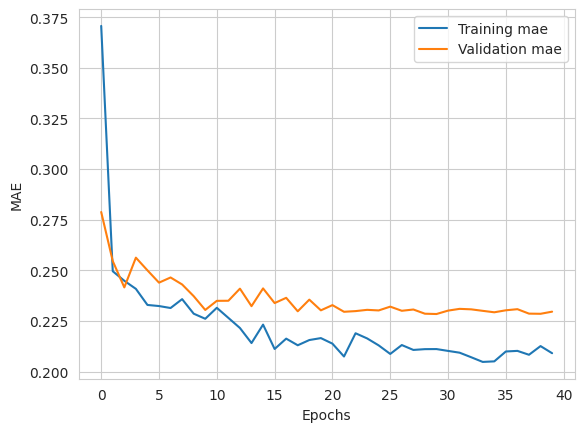

In [22]:
plt.plot(history.history['mae'], label='Training mae')
plt.plot(history.history['val_mae'], label='Validation mae')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions on the test set
y_pred = model.predict(x_test_scaled)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
Mean Absolute Error (MAE): 0.2202
Mean Squared Error (MSE): 0.0675
Root Mean Squared Error (RMSE): 0.2598


In [24]:
import joblib
from tensorflow.keras.models import save_model

model.save('fashion_item_recommendation.h5')

joblib.dump(scaler, 'scaler.pkl')

print("Model & scaler saved.")

Model & scaler saved.


Evaluating with test dataset

In [27]:
loss, mae = model.evaluate(x_test_scaled, y_test)
print(f"Mean Absolute Error on test dataset: {mae:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2253 - mae: 0.2253
Mean Absolute Error on test dataset: 0.2202
